'''
v1: Scienceon, DBPIA, NTIS AuthorPapers 접근하여 Rawdata에서 필터링된 papers를 추가
v2: Answer 변경 및 f_id 수정 중
v3: time, tqdm 추가하여 속도 확인
v4: Scienceon, DBPIA에 mng로 검색 추가
v5: DBPIA 삭제하고 KCI 추가 & Rawdata 먼저 접급으로 변경, answer check 추가
'''

In [30]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import sklearn.preprocessing

In [9]:
xlsData = pd.read_excel("C:/workSpace(expert)/PM10.xlsx")

In [10]:
dir(xlsData)

['Day',
 'Gas_50',
 'Gas_50_NoDir',
 'Hour',
 'Humidity',
 'Month',
 'Oil_0_NoDir',
 'Oil_50',
 'PM10',
 'Season',
 'Shift',
 'T',
 'Temp',
 'Year',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__

In [11]:
xlsData

,Year,Month,Day,Hour,Season,Shift,Temp,Wind Speed,Humidity,Air Pressure,...,우박,낮은안개,눈보라,동우,Coal Gasification_0_NoDir,Oil_0_NoDir,Gas_50_NoDir,Oil_50,Gas_50,PM10
0,2016,1,1,0,Winter,Morning Night,-0.8,0.7,78.0,1026.2,...,0,0,0,0,0.00,61.4,578.741,88,0.000,104
1,2016,1,1,1,Winter,Morning Night,-1.8,0.3,85.0,1026.2,...,0,0,0,0,0.00,61.4,578.741,0,0.000,102
2,2016,1,1,2,Winter,Morning Night,-2.0,0.1,88.0,1025.8,...,0,0,0,0,0.00,61.4,578.741,0,0.000,92
3,2016,1,1,3,Winter,Morning Night,-2.6,0.6,90.0,1026.1,...,0,0,0,0,0.00,61.4,578.741,0,0.000,102
4,2016,1,1,4,Winter,Morning Night,-3.0,0.3,92.0,1025.7,...,0,0,0,0,0.00,61.4,578.741,0,0.000,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,2017,12,31,19,Winter,Rush,1.0,1.0,39.0,1017.2,...,0,0,0,0,346.33,61.4,680.441,0,101.700,24
16156,2017,12,31,20,Winter,Night,0.5,1.2,45.0,1017.6,...,0,0,0,0,346.33,61.4,680.441,0,578.741,40
16157,2017,12,31,21,Winter,Night,0.1,0.5,51.0,1017.9,...,0,0,0,0,346.33,61.4,680.441,0,101.700,46
16158,2017,12,31,22,Winter,Night,0.1,0.8,53.0,1018.2,...,0,0,0,0,346.33,61.4,680.441,0,101.700,54


In [16]:
X = xlsData[['Temp', 'Wind Speed','Humidity']]
Y = xlsData['PM10']

In [17]:
df_X = pd.DataFrame(X)
df_X.head()

,Temp,Wind Speed,Humidity
0,-0.8,0.7,78.0
1,-1.8,0.3,85.0
2,-2.0,0.1,88.0
3,-2.6,0.6,90.0
4,-3.0,0.3,92.0


In [18]:
df_Y = pd.DataFrame(Y)
df_Y.head()

,PM10
0,104
1,102
2,92
3,102
4,94


In [22]:
import sklearn

x_std = sklearn.preprocessing.StandardScaler().fit_transform(X)
x_std

array([[-1.28200756, -0.91552241,  1.02320955],
       [-1.3740977 , -1.34703189,  1.3667778 ],
       [-1.39251573, -1.56278664,  1.51402134],
       ...,
       [-1.19912644, -1.13127715, -0.30198228],
       [-1.19912644, -0.80764504, -0.20381992],
       [-1.23596249, -1.02339978, -0.15473874]])

In [23]:
features = x_std.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.00006189  0.20278974 -0.02564069]
 [ 0.20278974  1.00006189 -0.3667102 ]
 [-0.02564069 -0.3667102   1.00006189]]


In [24]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-0.36549918 -0.87545606 -0.31620725]
 [-0.69754992  0.0326868   0.71579025]
 [ 0.61630712 -0.4821911   0.6226213 ]]


In [25]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[1.43031867 0.97836775 0.59149923]


In [26]:
eig_vals[0] / sum(eig_vals)

0.47674338803169386

In [27]:
projected_X = x_std.dot(eig_vecs.T[0])
projected_X

array([1.73780662, 2.28420846, 2.53218717, ..., 1.04128819, 0.87603679,
       1.07024913])

In [28]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y

In [29]:
result.head(10)

,PC1,y-axis,label
0,1.737807,0.0,104
1,2.284208,0.0,102
2,2.532187,0.0,92
3,2.236631,0.0,102
4,2.536343,0.0,94
5,2.406038,0.0,92
6,2.220635,0.0,94
7,2.665403,0.0,98
8,2.516191,0.0,106
9,2.364902,0.0,98


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\Users\sangjun\Anaconda3\envs\expert397\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PCA result')

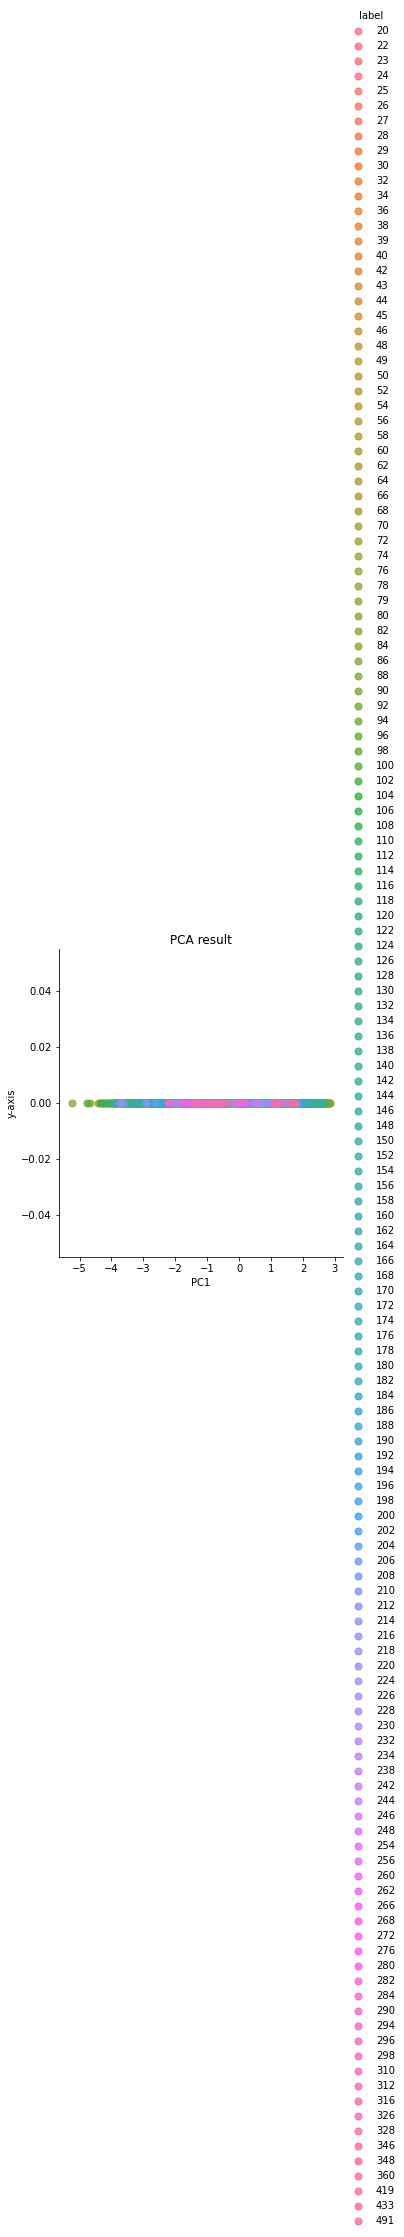

In [32]:
sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,
           scatter_kws={"s":50},
           hue="label")

plt.title('PCA result')